In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Indian Liver Patient.csv")

In [4]:
df.head()

Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AG  LiverPatient
0   65  Female   0.7  0.1      187    16    18  6.8  3.3  0.90             1
1   62    Male  10.9  5.5      699    64   100  7.5  3.2  0.74             1
2   62    Male   7.3  4.1      490    60    68  7.0  3.3  0.89             1
3   58    Male   1.0  0.4      182    14    20  6.8  3.4  1.00             1
4   72    Male   3.9  2.0      195    27    59  7.3  2.4  0.40             1

In [5]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG', 'LiverPatient'],
      dtype='object')

In [6]:
df=df[['Gender','Age','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','AG','LiverPatient']]

In [7]:
df

Gender  Age    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AG  LiverPatient
0    Female   65   0.7  0.1      187    16    18  6.8  3.3  0.90             1
1      Male   62  10.9  5.5      699    64   100  7.5  3.2  0.74             1
2      Male   62   7.3  4.1      490    60    68  7.0  3.3  0.89             1
3      Male   58   1.0  0.4      182    14    20  6.8  3.4  1.00             1
4      Male   72   3.9  2.0      195    27    59  7.3  2.4  0.40             1
..      ...  ...   ...  ...      ...   ...   ...  ...  ...   ...           ...
578    Male   60   0.5  0.1      500    20    34  5.9  1.6  0.37             2
579    Male   40   0.6  0.1       98    35    31  6.0  3.2  1.10             1
580    Male   52   0.8  0.2      245    48    49  6.4  3.2  1.00             1
581    Male   31   1.3  0.5      184    29    32  6.8  3.4  1.00             1
582    Male   38   1.0  0.3      216    21    24  7.3  4.4  1.50             2

[583 rows x 11 columns]

In [8]:
df['LiverPatient'].unique()

array([1, 2], dtype=int64)

In [9]:
df["LiverPatient"]=df["LiverPatient"].map({1:0,2:1})

In [10]:
df.duplicated().sum()

13

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

Gender          0
Age             0
TB              0
DB              0
Alkphos         0
Sgpt            0
Sgot            0
TP              0
ALB             0
AG              4
LiverPatient    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Gender          0
Age             0
TB              0
DB              0
Alkphos         0
Sgpt            0
Sgot            0
TP              0
ALB             0
AG              0
LiverPatient    0
dtype: int64

In [15]:
df.columns


Index(['Gender', 'Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG', 'LiverPatient'],
      dtype='object')

In [16]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        566 non-null    object 
 1   Age           566 non-null    int64  
 2   TB            566 non-null    float64
 3   DB            566 non-null    float64
 4   Alkphos       566 non-null    int64  
 5   Sgpt          566 non-null    int64  
 6   Sgot          566 non-null    int64  
 7   TP            566 non-null    float64
 8   ALB           566 non-null    float64
 9   AG            566 non-null    float64
 10  LiverPatient  566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.1+ KB


In [18]:
import plotly.express as px

In [19]:
for i in df.columns:
    fig=px.box(df,i)
    fig.show()
    

In [20]:
df.columns

Index(['Gender', 'Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG', 'LiverPatient'],
      dtype='object')

In [21]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail="both",fold=1.5,variables=["TB"])

In [22]:
df["TB"]=win.fit_transform(df[['TB']])

In [23]:
win1=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["DB"])

In [24]:
df["DB"]=win1.fit_transform(df[['DB']])

In [25]:
win3=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["Alkphos"])

In [26]:
df["Alkphos"]=win3.fit_transform(df[['Alkphos']])

In [27]:
win4=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["Sgpt"])
df["Sgpt"]=win4.fit_transform(df[['Sgpt']])

In [28]:
win5=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["Sgot"])
df["Sgot"]=win5.fit_transform(df[['Sgot']])

In [29]:
win6=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["AG"])
df["AG"]=win6.fit_transform(df[['AG']])

In [30]:
win7=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["TP"])
df["TP"]=win7.fit_transform(df[['TP']])

<AxesSubplot:>

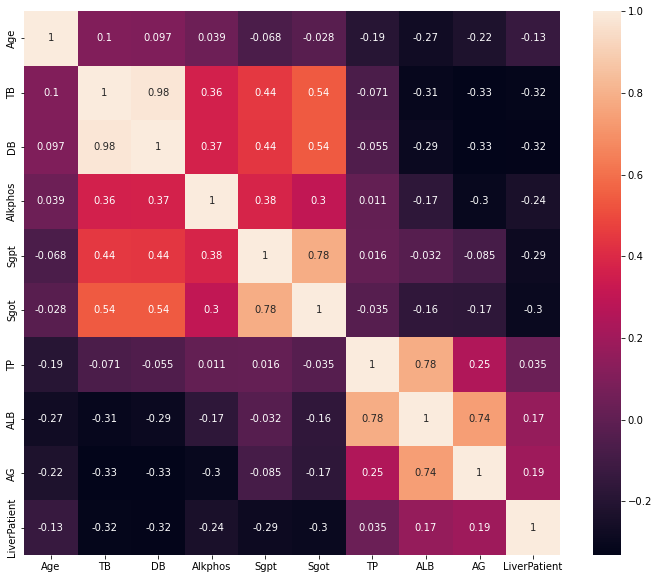

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

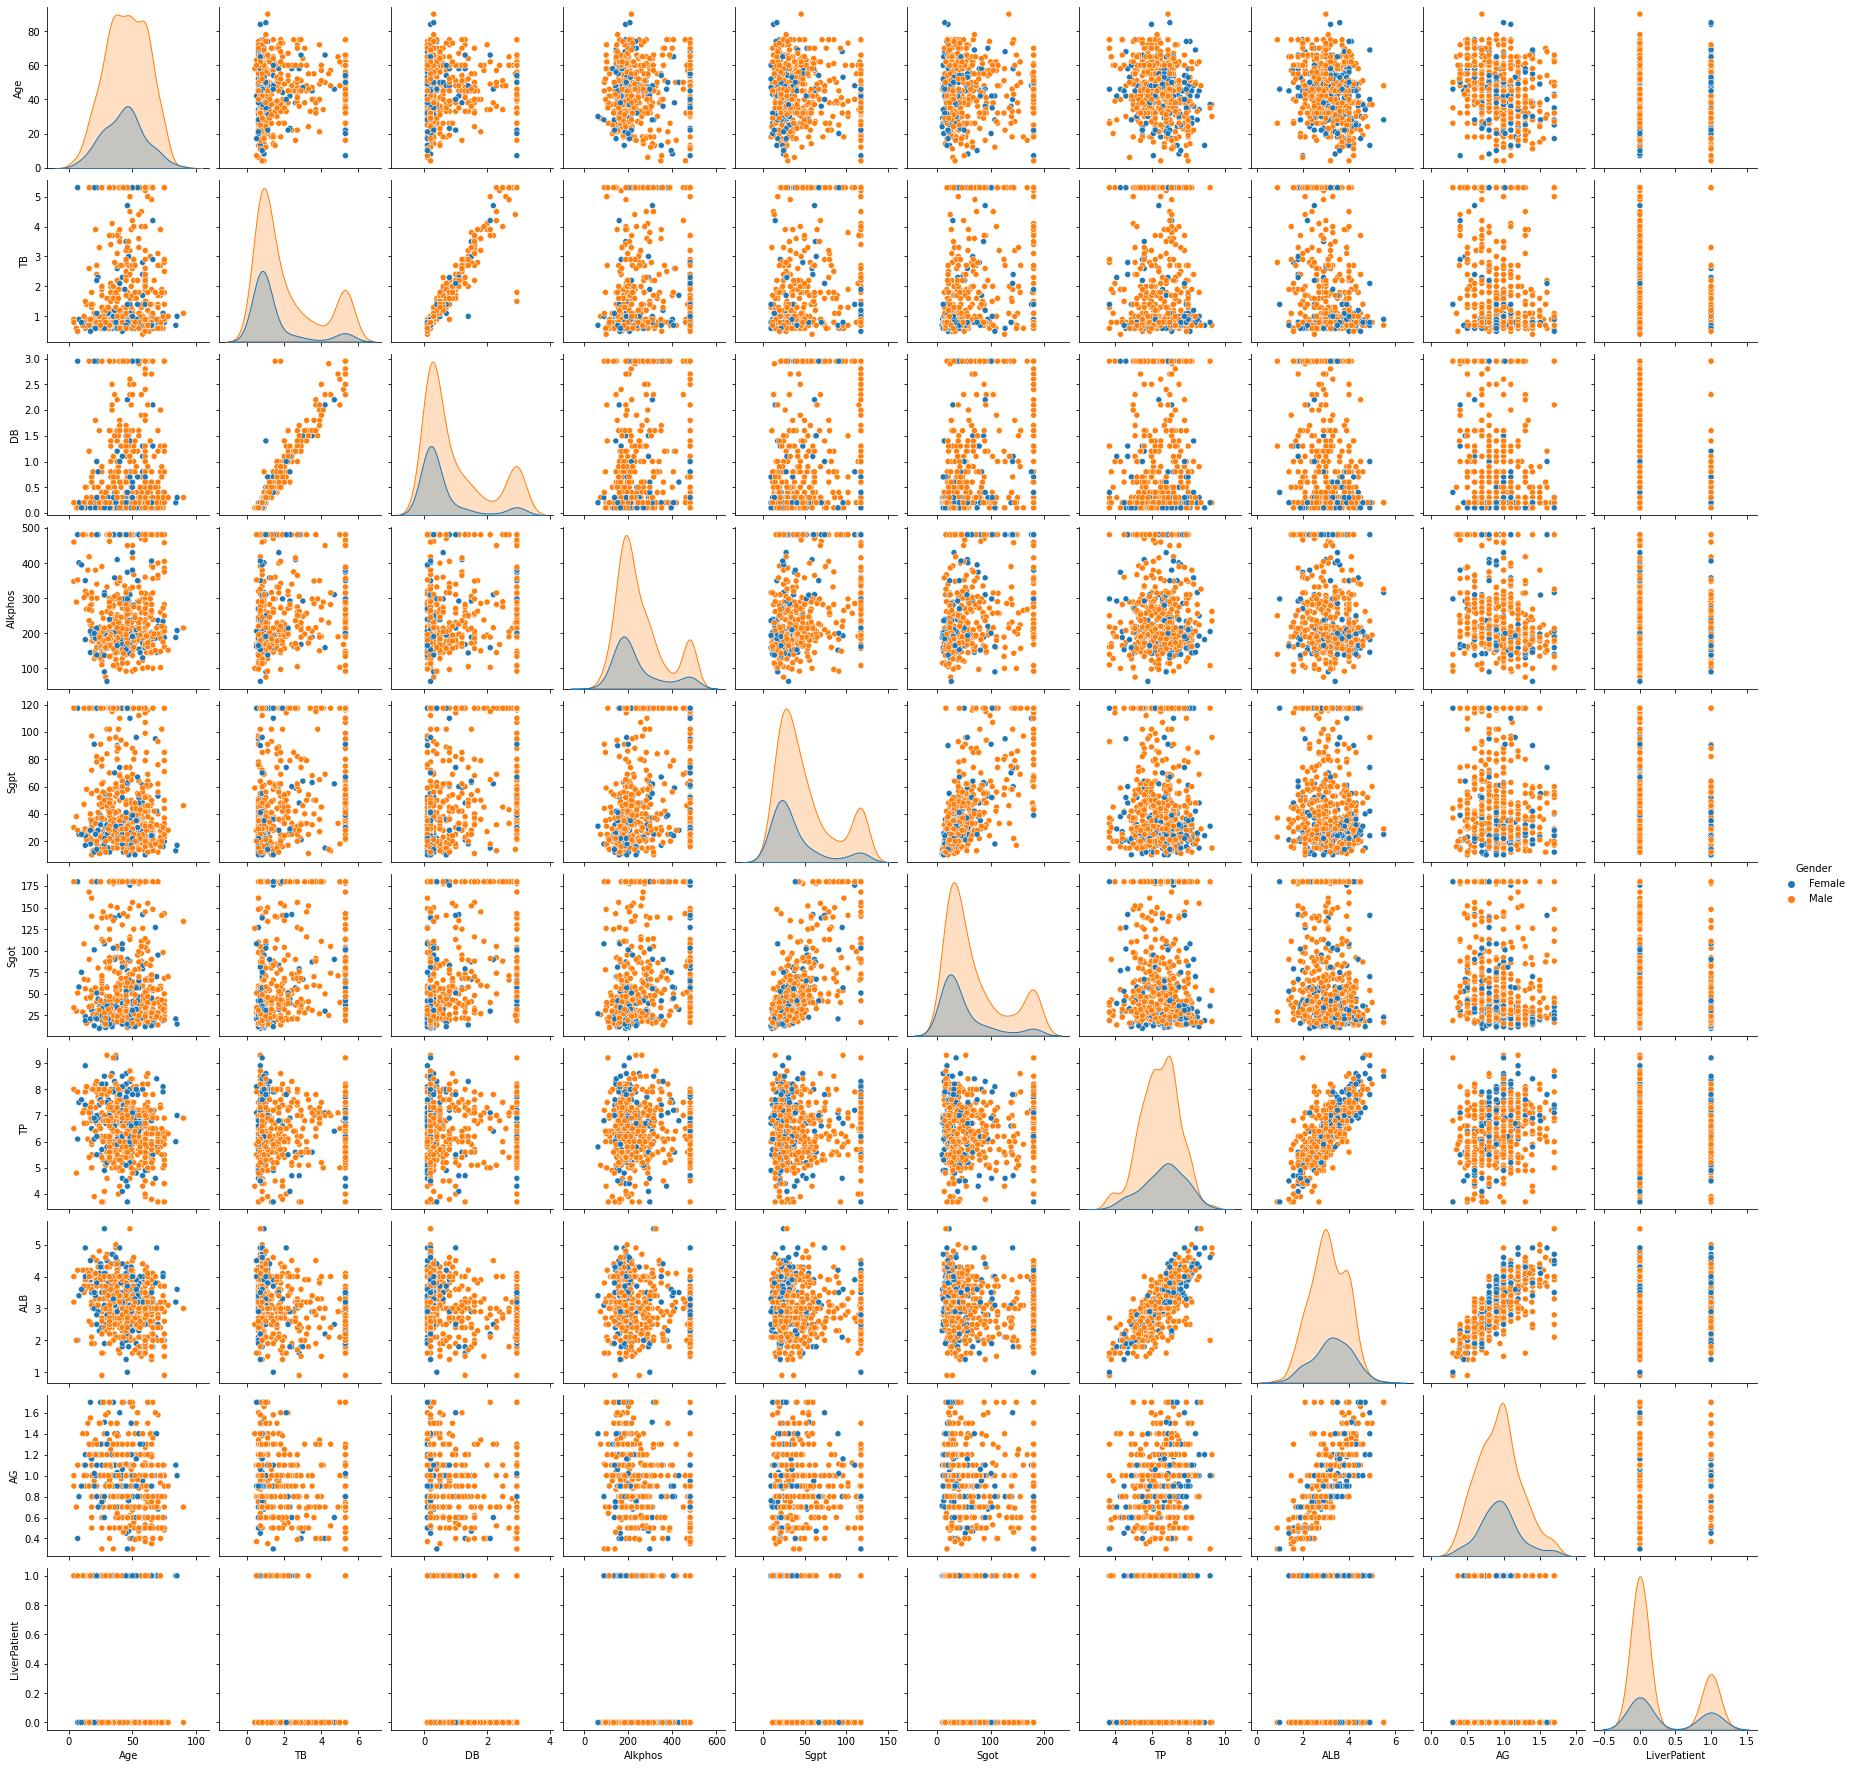

In [32]:
sns.pairplot(df,hue="Gender")

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [34]:
a=ohe.fit_transform(df.iloc[:,:1])

In [35]:
a

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [36]:
b=ohe.get_feature_names_out()

In [37]:
b

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [38]:
a1=pd.DataFrame(a,columns=b)
a1.reset_index(inplace=True)

In [39]:
a1

index  Gender_Female  Gender_Male
0        0            1.0          0.0
1        1            0.0          1.0
2        2            0.0          1.0
3        3            0.0          1.0
4        4            0.0          1.0
..     ...            ...          ...
561    561            0.0          1.0
562    562            0.0          1.0
563    563            0.0          1.0
564    564            0.0          1.0
565    565            0.0          1.0

[566 rows x 3 columns]

In [40]:
df.reset_index(inplace=True)

In [41]:
df1=pd.concat([a1,df],axis=1)

In [42]:
df1

index  Gender_Female  Gender_Male  index  Gender  Age   TB    DB  \
0        0            1.0          0.0      0  Female   65  0.7  0.10   
1        1            0.0          1.0      1    Male   62  5.3  2.95   
2        2            0.0          1.0      2    Male   62  5.3  2.95   
3        3            0.0          1.0      3    Male   58  1.0  0.40   
4        4            0.0          1.0      4    Male   72  3.9  2.00   
..     ...            ...          ...    ...     ...  ...  ...   ...   
561    561            0.0          1.0    578    Male   60  0.5  0.10   
562    562            0.0          1.0    579    Male   40  0.6  0.10   
563    563            0.0          1.0    580    Male   52  0.8  0.20   
564    564            0.0          1.0    581    Male   31  1.3  0.50   
565    565            0.0          1.0    582    Male   38  1.0  0.30   

     Alkphos  Sgpt   Sgot   TP  ALB    AG  LiverPatient  
0      187.0  16.0   18.0  6.8  3.3  0.90             0  
1      481.0  64.0  100.0  7.5  3.2  0.74             0  
2      481.0  60.0   68.0  7.0  3.3  0.89             0  
3      182.0  14.0   20.0  6.8  3.4  1.00             0  
4      195.0  27.0   59.0  7.3  2.4  0.40             0  
..       ...   ...    ...  ...  ...   ...           ...  
561    481.0  20.0   34.0  5.9  1.6  0.37             1  
562     98.0  35.0   31.0  6.0  3.2  1.10             0  
563    245.0  48.0   49.0  6.4  3.2  1.00             0  
564    184.0  29.0   32.0  6.8  3.4  1.00             0  
565    216.0  21.0   24.0  7.3  4.4  1.50             1  

[566 rows x 15 columns]

In [43]:
df1.drop(columns=["index",'Gender'],axis=1,inplace=True)

In [44]:
df1

Gender_Female  Gender_Male  Age   TB    DB  Alkphos  Sgpt   Sgot   TP  \
0              1.0          0.0   65  0.7  0.10    187.0  16.0   18.0  6.8   
1              0.0          1.0   62  5.3  2.95    481.0  64.0  100.0  7.5   
2              0.0          1.0   62  5.3  2.95    481.0  60.0   68.0  7.0   
3              0.0          1.0   58  1.0  0.40    182.0  14.0   20.0  6.8   
4              0.0          1.0   72  3.9  2.00    195.0  27.0   59.0  7.3   
..             ...          ...  ...  ...   ...      ...   ...    ...  ...   
561            0.0          1.0   60  0.5  0.10    481.0  20.0   34.0  5.9   
562            0.0          1.0   40  0.6  0.10     98.0  35.0   31.0  6.0   
563            0.0          1.0   52  0.8  0.20    245.0  48.0   49.0  6.4   
564            0.0          1.0   31  1.3  0.50    184.0  29.0   32.0  6.8   
565            0.0          1.0   38  1.0  0.30    216.0  21.0   24.0  7.3   

     ALB    AG  LiverPatient  
0    3.3  0.90             0  
1    3.2  0.74             0  
2    3.3  0.89             0  
3    3.4  1.00             0  
4    2.4  0.40             0  
..   ...   ...           ...  
561  1.6  0.37             1  
562  3.2  1.10             0  
563  3.2  1.00             0  
564  3.4  1.00             0  
565  4.4  1.50             1  

[566 rows x 12 columns]

In [45]:
x=df1.drop("LiverPatient",axis=1)

In [46]:
y=df1["LiverPatient"]

In [47]:
x

Gender_Female  Gender_Male  Age   TB    DB  Alkphos  Sgpt   Sgot   TP  \
0              1.0          0.0   65  0.7  0.10    187.0  16.0   18.0  6.8   
1              0.0          1.0   62  5.3  2.95    481.0  64.0  100.0  7.5   
2              0.0          1.0   62  5.3  2.95    481.0  60.0   68.0  7.0   
3              0.0          1.0   58  1.0  0.40    182.0  14.0   20.0  6.8   
4              0.0          1.0   72  3.9  2.00    195.0  27.0   59.0  7.3   
..             ...          ...  ...  ...   ...      ...   ...    ...  ...   
561            0.0          1.0   60  0.5  0.10    481.0  20.0   34.0  5.9   
562            0.0          1.0   40  0.6  0.10     98.0  35.0   31.0  6.0   
563            0.0          1.0   52  0.8  0.20    245.0  48.0   49.0  6.4   
564            0.0          1.0   31  1.3  0.50    184.0  29.0   32.0  6.8   
565            0.0          1.0   38  1.0  0.30    216.0  21.0   24.0  7.3   

     ALB    AG  
0    3.3  0.90  
1    3.2  0.74  
2    3.3  0.89  
3    3.4  1.00  
4    2.4  0.40  
..   ...   ...  
561  1.6  0.37  
562  3.2  1.10  
563  3.2  1.00  
564  3.4  1.00  
565  4.4  1.50  

[566 rows x 11 columns]

In [48]:
import joblib

In [49]:
joblib.dump(ohe,"ohe_joblib")

['ohe_joblib']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34)

In [51]:
from sklearn.tree import DecisionTreeClassifier
RFC=DecisionTreeClassifier()

In [52]:
RFC.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
base_pred=RFC.predict(x_test)

In [54]:
base_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [56]:
confusion_matrix(y_test,base_pred)

array([[76, 44],
       [33, 17]], dtype=int64)

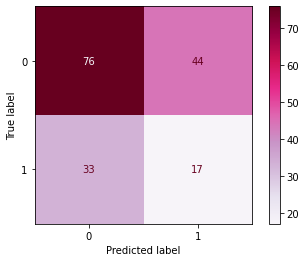

In [57]:
plot_confusion_matrix(RFC,x_test,y_test,cmap='PuRd')

In [58]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       120
           1       0.28      0.34      0.31        50

    accuracy                           0.55       170
   macro avg       0.49      0.49      0.49       170
weighted avg       0.57      0.55      0.56       170



In [59]:
from sklearn.ensemble import RandomForestClassifier
RFR=RandomForestClassifier(n_estimators =100,max_features='auto',max_depth=8,criterion="gini")

In [60]:
RFR.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features='auto')

In [61]:
bas_pred=RFR.predict(x_test)

In [62]:
bas_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
confusion_matrix(y_test,bas_pred)

array([[101,  19],
       [ 39,  11]], dtype=int64)

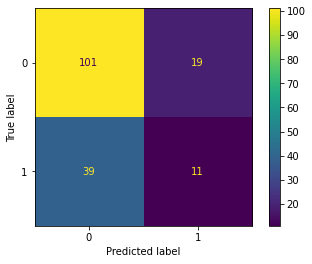

In [64]:
plot_confusion_matrix(RFR,x_test,y_test)

In [65]:
print(classification_report(y_test,bas_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       120
           1       0.37      0.22      0.27        50

    accuracy                           0.66       170
   macro avg       0.54      0.53      0.53       170
weighted avg       0.62      0.66      0.63       170



In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [67]:
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
pred=model.predict(x_test)

In [69]:
confusion_matrix(y_test,pred)

array([[101,  19],
       [ 37,  13]], dtype=int64)

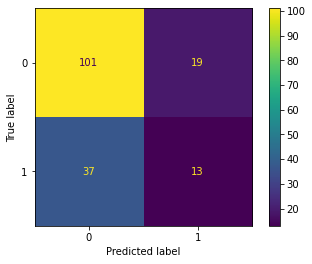

In [70]:
plot_confusion_matrix(model,x_test,y_test)

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       120
           1       0.41      0.26      0.32        50

    accuracy                           0.67       170
   macro avg       0.57      0.55      0.55       170
weighted avg       0.64      0.67      0.65       170



In [72]:
joblib.dump(model,"logmodel.pkl")

['logmodel.pkl']

In [73]:
check=df.copy()

In [74]:
check=check.head(1)

In [75]:
check

index  Gender  Age   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB   AG  \
0      0  Female   65  0.7  0.1    187.0  16.0  18.0  6.8  3.3  0.9   

   LiverPatient  
0             0

In [76]:
check.drop(columns=["LiverPatient","index"],axis=1,inplace=True)

In [77]:
check

Gender  Age   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB   AG
0  Female   65  0.7  0.1    187.0  16.0  18.0  6.8  3.3  0.9

In [78]:
one_hot=joblib.load("ohe_joblib")
one_hot

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [79]:
l=one_hot.transform(check.iloc[:,:1])

In [80]:
l

array([[1., 0.]])

In [81]:
c=one_hot.get_feature_names_out()
c

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [82]:
t=pd.DataFrame(l,columns=c)

In [83]:
t

Gender_Female  Gender_Male
0            1.0          0.0

In [84]:
l2=check.iloc[:,1:]

In [85]:
l2

Age   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB   AG
0   65  0.7  0.1    187.0  16.0  18.0  6.8  3.3  0.9

In [86]:
final=pd.concat([l2,t],axis=1)

In [87]:
final

Age   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB   AG  Gender_Female  \
0   65  0.7  0.1    187.0  16.0  18.0  6.8  3.3  0.9            1.0   

   Gender_Male  
0          0.0

In [88]:
final_model = joblib.load("logmodel.pkl")
final_model

LogisticRegression()

In [89]:
final_model.predict(final)

array([0], dtype=int64)